In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [115]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 🔹 Encode Target Variable (Churn)

In [116]:
# Convert "Yes" to 1, "No" to 0:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

#### 🔹 Separate Features and Target

In [117]:
# customerID is a useless identifie
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

#### 🔹 Encode Categorical Variables

In [118]:
X_encoded = pd.get_dummies(X, drop_first=True)

#### 🔹 Split into Train/Test Sets

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

### Scale numeric features?

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

#### 🔹 Fit the Model

In [121]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### 🔹 Make Predictions

In [122]:
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]  # For AUC and threshold tuning

#### 🔹 Evaluate the Model

Accuracy: 0.7764371894960965
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.59      0.50      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC AUC: 0.8025988788137126


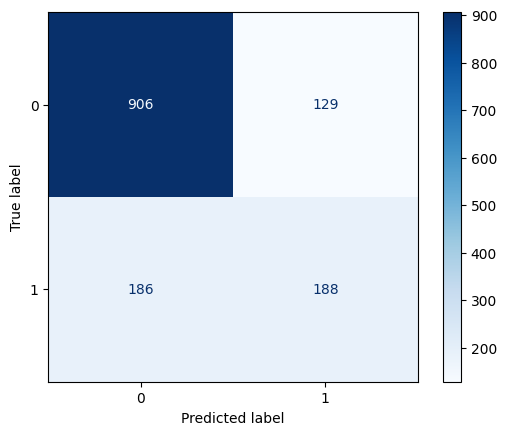

In [123]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap="Blues")

# ROC AUC Score
print("ROC AUC:", roc_auc_score(y_test, y_prob))


### ✅ Random Forest Classifier


#### 🔹 Train the Model

In [124]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### 🔹 Predict and Evaluate

In [125]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

#### 🔹 Evaluation Metrics

Random Forest Accuracy: 0.7955997161107168
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.47      0.55       374

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

ROC AUC: 0.8277351520318271


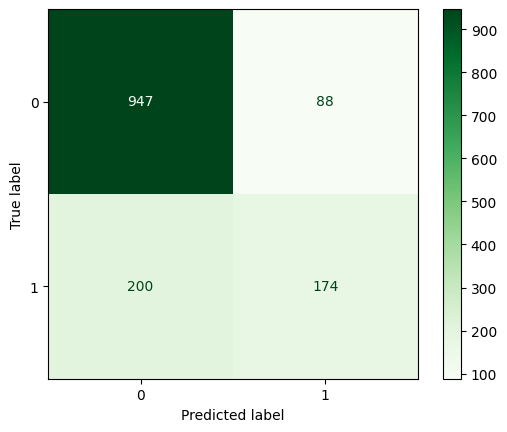

In [126]:

# Accuracy & Report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Greens")

# AUC Score
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

#### 🔹 Feature Importance

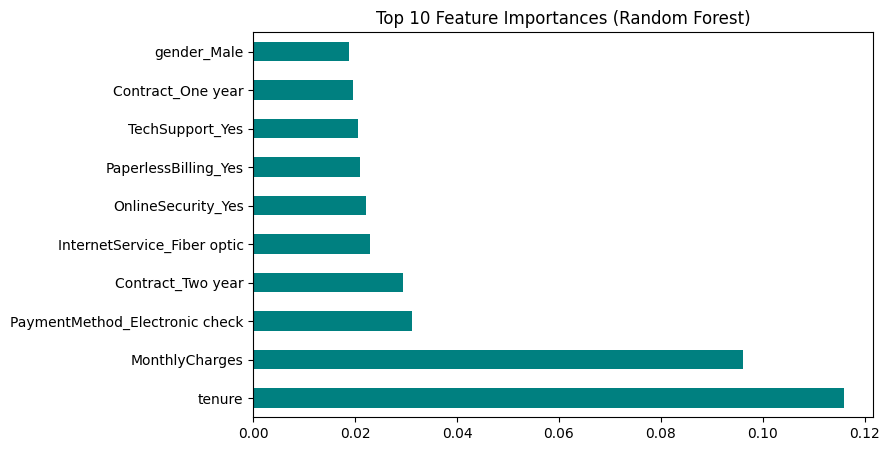

In [127]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8, 5), color='teal')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

### ✅ XGBoost Classifier

#### 🔹 Train

In [134]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
)

xgb.fit(X_train, y_train)


d:\Morteza\Projects\projects\Customer-Churn-Analysis\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:37:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


#### 🔹 Predict and Evaluate

In [135]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

XGBoost Accuracy: 0.7998580553584103
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC: 0.8433258415355602


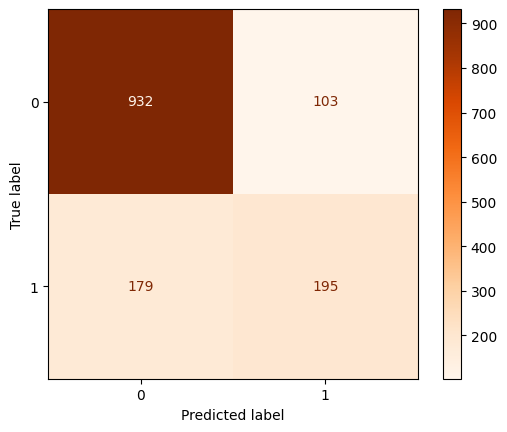

In [137]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, cmap="Oranges")

#### 🔹 Feature Importance

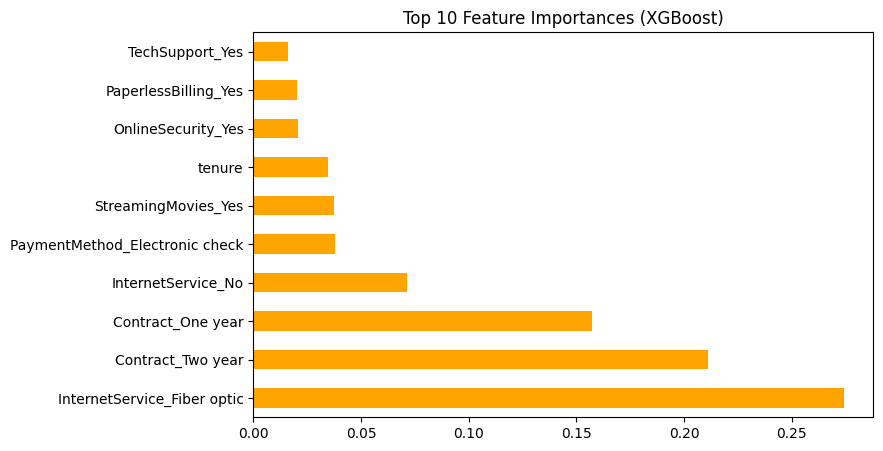

In [139]:
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
xgb_importances.nlargest(10).plot(kind='barh', figsize=(8, 5), color='orange')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()
